In [4]:
%matplotlib inline
import torch
from sebm.sgld import SGLD_sampler
from sebm.cebm_sgld import init_cebm
dataset =  'cifar10' # 'svhn' # 'cifar10' # 'mnist' #  'flowers102' #
if dataset == 'mnist' or dataset =='fashionmnist':
    input_channels, im_height, im_width = 1, 28, 28
else:
    input_channels, im_height, im_width = 3, 32, 32
device = torch.device('cuda:0')
arch =  'simplenet2' # 'wresnet' # 'simplenet'
heldout = -1
ss = 2
seed = 1
lr, reg_alpha = 5e-5, 1e-1
# lr, reg_alpha = 5e-5, 5e-3
lr, reg_alpha = 1e-4, 1e-1
# lr, reg_alpha = 5e-5, 5e-2
optimize_priors = False
channels, kernels, strides, paddings =[64,128,256,512], [3,4,4,4], [1,2,2,2], [1,1,1,1]
# hidden_dim, latent_dim, activation = [1024], 128, 'LeakyReLU'
hidden_dim, latent_dim, activation = [1024], 128, 'Swish'

# channels, kernels, strides, paddings =[64,64,32,32], [3,4,4,4], [1,2,2,2], [1,1,1,1]
# hidden_dim, latent_dim, activation = [128], 128, 'Swish'

data_noise_std = 3e-2
sgld_noise_std, sgld_lr, sgld_num_steps = 7.5e-3, 2.0, 60
buffer_init, buffer_dup_allowed = True, True
data_dir = '../../../sebm_data/'
load_version = 'cebm_%sss-out=%s-d=%s-seed=%d-lr=%s-zd=%d-d_ns=%s-sgld-ns=%s-lr=%s-steps=%s-reg=%s-act=%s-arch=%s' % (ss, heldout, dataset, seed, lr, latent_dim, data_noise_std, sgld_noise_std, sgld_lr, sgld_num_steps,  reg_alpha, activation, arch)
if arch == 'wresnet':
    ebm = init_cebm(arch=arch,
                    ss=ss,
                    optimize_priors=optimize_priors,
                    device=device,
                    depth=depth,
                    width=width,
                    hidden_dim=hidden_dim,
                    latent_dim=latent_dim,
                    act=activation)
elif arch == 'simplenet2':
    ebm = init_cebm(arch=arch,
                    ss=ss,
                    optimize_priors=optimize_priors,
                    device=device,
                    im_height=im_height, 
                    im_width=im_width, 
                    input_channels=input_channels, 
                    channels=channels, 
                    kernels=kernels, 
                    strides=strides, 
                    paddings=paddings, 
                    hidden_dim=hidden_dim,
                    latent_dim=latent_dim,
                    activation=activation)
ebm = ebm.cuda().to(device)
print('Loading trained weights..')
ebm.load_state_dict(torch.load('../weights/cp-%s' % load_version)['model_state_dict'])

Initialize Model=CEBM_2ss...
Loading trained weights..


<All keys matched successfully>

In [5]:
from sebm.eval import *
evaluator = Evaluator_EBM(ebm, device, dataset, data_dir, data_noise_std=1e-2)

In [ ]:
min_distances = similarity_ebm_z_space(evaluator, train_batch_size=5000, test_batch_size=5000, model_name='cebm')

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
_ = ax.hist(min_distances.squeeze(), bins=100)

In [ ]:
# np.quantile(min_distances.numpy(), 0.75) / np.quantile(min_distances.numpy(), 0.25)

In [6]:
# min_distances = similarity_pixel_space(dataset, dataset, data_dir, train_batch_size=500, test_batch_size=500)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
_ = ax.hist(torch.cat(min_distances[:-1], 0).squeeze(), bins=100)
ax.set_title('Nearest Neighbor Distances in Pixel Space - CIFAR10')
plt.savefig('hist_nn_distance_pixel_cifar10.png')

In [ ]:
np.quantile(min_distances.numpy(), 0.75) / np.quantile(min_distances.numpy(), 0.25)

In [ ]:
# ys_test, pred_ys_test = evaluator.similarity_ebm_density_space(train_batch_size=1000, test_batch_size=1000)

In [ ]:
# scores = evaluator.oodauc(dataset_ood='emnist', score='gradient')
# scores

In [ ]:
# num_shots = 1
# num_runs = 10
# Accu = 0.0
# for i in range(num_runs):
#     print('dataset=%s, run=%d / %d' % (dataset, i+1, num_runs))
#     data = torch.load('/home/hao/Research/sebm_data/fewshots/%s/%d/%d.pt' % (dataset, num_shots*10, i+1))
#     accu = train_logistic_classifier(evaluator, train_data=data)
#     Accu += accu
# Accu/= num_runs
# Accu

In [ ]:
# from sebm.eval import draw_one_batch
# dataset = 'svhn'
# list_num_shots = [1, 10, 100]
# for num_shots in list_num_shots:
#     print('num of shots=%d' % num_shots)
#     for i in range(10):
#         images, labels = draw_one_batch(num_shots, 
#                                          dataset, 
#                                          data_dir, 
#                                          train=True, 
#                                          normalize=False, 
#                                          flatten=False)
#         data = {'images': images, 'labels' : labels}
#         torch.save(data, '/home/hao/Research/sebm_data/fewshots/%s/%d/%d.pt' % (dataset, num_shots*10, i+1))

In [ ]:
# logging_interval = 200 # None otherwise
# test_batch_size = 10
# init_samples, labels = draw_one_batch(1, dataset, data_dir, train=False, normalize=True, flatten=False)

# images_ebm = evaluator.uncond_sampling_ll(sample_size=3,
#                                           batch_size=test_batch_size, 
#                                           sgld_steps=2000,
#                                           sgld_lr=2.0,
#                                           sgld_noise_std=1e-3,
#                                           init_images=init_samples,
#                                           grad_clipping=False,
#                                           logging_interval=None)
# nearestneighbours = evaluator.nn_latents(images_ebm)
# plot_evolving_samples(images_ebm, nearestneighbours, fs=8, save_name=None)

In [ ]:
# evaluator.plot_all_samples(list_images=images_ebm, fs=1.0)

sample unconditionally from ebm..
plotting the samples..


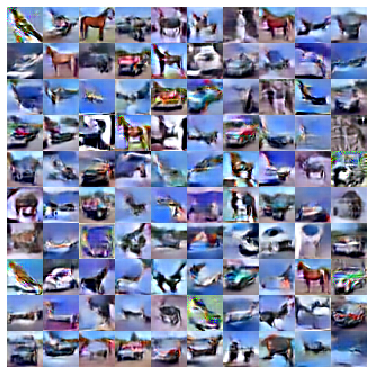

In [7]:
images_ebm = evaluator.uncond_sampling(batch_size=100, 
                                          sgld_steps=1000,
                                          sgld_lr=2.0,
                                          sgld_noise_std=1e-3,
                                          grad_clipping=False,
                                          init_samples=None,
                                          logging_interval=None)
evaluator.plot_final_samples(images_ebm, fs=5, save=False)

In [ ]:
# evaluator.plot_all_samples(images_ebm, fs=6, save=True)

In [ ]:
evaluator.plot_oods(dataset='mnist', train=False, fs=4, save=False)

In [ ]:
# train_logistic_classifier(evaluator)

In [ ]:
zs, ys = evaluator.compute_tsne()
evaluator.plot_tsne(zs, ys, save=True)